House in USA DataScience Project

Imports

In [1]:
import pandas as pd # data processing
import matplotlib.pyplot as plt # basic plotting 
import numpy as np # linear algebra
import geopandas as gpd # geospatial data
from scipy import stats as st # probability distributions and statistical functions
import seaborn as sns #data visualization library based on matplotlib
import folium #interactive leaflet map

from folium.plugins import FloatImage

from matplotlib.colors import ListedColormap
from shapely.geometry import Point
from sklearn import preprocessing

# Model
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline 
plt.style.use('ggplot') # use ggplot style
sns.set(style='whitegrid', palette='pastel', color_codes=True) 
#sns.mpl.rc('figure', figsize=(30,15))

In [2]:
#!pip install geopandas

In [3]:
#!pip install folium

# Dataset Overview

**Dataset upload**

In [4]:
df = pd.read_csv('/home/thamirisbrandao/code/thamirisbrandao/house_salesUSA/house_salesUSA/data/kc_house_data.csv', parse_dates=['date'])

**Dataset Overview**

In [5]:
df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

**Preprocessing Dataset**

In [7]:
df.duplicated().sum()

0

In [8]:
missing_col = df.isnull().sum().sort_values(ascending=False)
missing_col

id               0
grade            0
sqft_living15    0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
sqft_basement    0
sqft_above       0
condition        0
date             0
view             0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
bedrooms         0
price            0
sqft_lot15       0
dtype: int64

## Analysis of number of bedrooms:

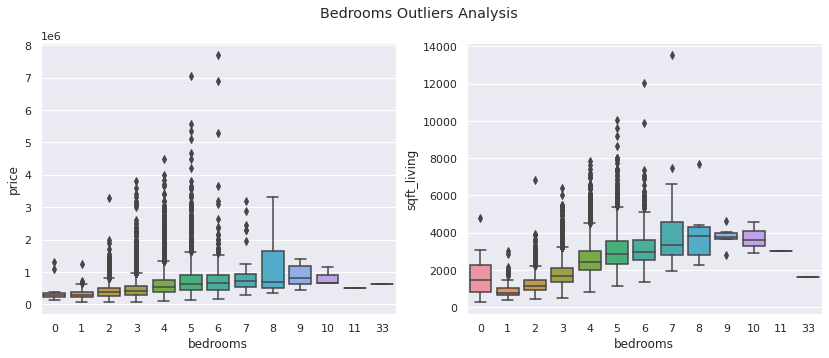

In [9]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize= (14,5))
fig.suptitle('Bedrooms Outliers Analysis')

#create boxplot in each subplot
sns.boxplot(data=df, x="bedrooms", y="price", ax=axes[0])
sns.boxplot(data=df, x="bedrooms", y="sqft_living", ax=axes[1]);

*Quantity of houses with ZERO bedroom and outliers*

In [10]:
no_bed_0 = (df[df['bedrooms']<1].value_counts().sum())
no_bed_11 = (df[df['bedrooms']==11].value_counts().sum())
no_bed_33 = (df[df['bedrooms']==33].value_counts().sum())

perc_no_bed = round((no_bed_0 + no_bed_11 + no_bed_33)*100/len(df),2)
print(f"Excluding the data with ZERO bedrooms and outliers, which represents {perc_no_bed}%")

Excluding the data with ZERO bedrooms and outliers, which represents 0.07%


Graphs shows bedrooms outliers for Zero bedrooms, 11 bedrooms and 33 bedrooms with low prices but high living areas, we will drop the columns, total of 13 lines

### Excluding bedrooms outliers, bedrooms = 0, 11, 33

In [11]:
df = df[(df['bedrooms']>=1) & (df['bedrooms']<11)]
df

id       date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13  221900.0         3       1.00         1180   
1      6414100192 2014-12-09  538000.0         3       2.25         2570   
2      5631500400 2015-02-25  180000.0         2       1.00          770   
3      2487200875 2014-12-09  604000.0         4       3.00         1960   
4      1954400510 2015-02-18  510000.0         3       2.00         1680   
...           ...        ...       ...       ...        ...          ...   
21608   263000018 2014-05-21  360000.0         3       2.50         1530   
21609  6600060120 2015-02-23  400000.0         4       2.50         2310   
21610  1523300141 2014-06-23  402101.0         2       0.75         1020   
21611   291310100 2015-01-16  400000.0         3       2.50         1600   
21612  1523300157 2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0          5650     1.0           0     0  ...      7        1180   
1          7242     2.0           0     0  ...      7        2170   
2         10000     1.0           0     0  ...      6         770   
3          5000     1.0           0     0  ...      7        1050   
4          8080     1.0           0     0  ...      8        1680   
...         ...     ...         ...   ...  ...    ...         ...   
21608      1131     3.0           0     0  ...      8        1530   
21609      5813     2.0           0     0  ...      8        2310   
21610      1350     2.0           0     0  ...      7        1020   
21611      2388     2.0           0     0  ...      8        1600   
21612      1076     2.0           0     0  ...      7        1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0                  0      1955             0    98178  47.5112 -122.257   
1                400      1951          1991    98125  47.7210 -122.319   
2                  0      1933             0    98028  47.7379 -122.233   
3                910      1965             0    98136  47.5208 -122.393   
4                  0      1987             0    98074  47.6168 -122.045   
...              ...       ...           ...      ...      ...      ...   
21608              0      2009             0    98103  47.6993 -122.346   
21609              0      2014             0    98146  47.5107 -122.362   
21610              0      2009             0    98144  47.5944 -122.299   
21611              0      2004             0    98027  47.5345 -122.069   
21612              0      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21608           1530        1509  
21609           1830        7200  
21610           1020        2007  
21611           1410        1287  
21612           1020        1357  

[21598 rows x 21 columns]

## Checking Bathrooms

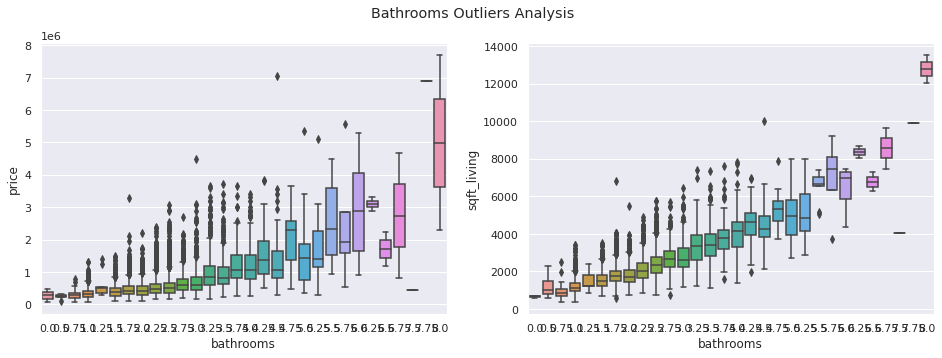

In [12]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize= (16,5))
fig.suptitle('Bathrooms Outliers Analysis')

#create boxplot in each subplot
sns.boxplot(data=df, x="bathrooms", y="price", ax=axes[0])
sns.boxplot(data=df, x="bathrooms", y="sqft_living", ax=axes[1]);

It was not possible to identify any outliers for the bathrooms after cleaning the bedrooms outliers

# Data pre-analysis

**Correlation Matrix**

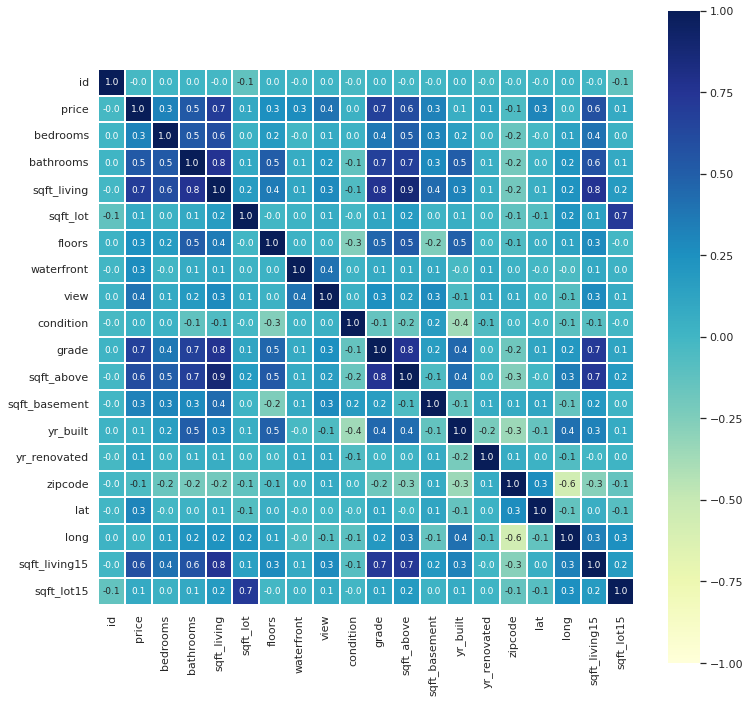

In [13]:
# corr = df.corr() -- Pearson Correlation

fig, ax = plt.subplots(figsize = (12, 12))
# Heatmap
sns.heatmap(df.corr(), cmap = "YlGnBu", annot = True, fmt = ".1f", annot_kws = {"fontsize": 9},
            vmin = -1, vmax = 1, square = True, linewidths = 0.01, linecolor = "white", cbar = True)

sns.despine(top = True, right = True, left = True, bottom = True)

**Features correlated with price**

In [14]:
# Focusing on house prices
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701941
grade            0.667781
sqft_above       0.605431
sqft_living15    0.585322
bathrooms        0.525903
view             0.397331
sqft_basement    0.323816
bedrooms         0.316602
lat              0.306850
waterfront       0.266434
floors           0.256901
yr_renovated     0.126510
sqft_lot         0.089830
sqft_lot15       0.082755
yr_built         0.054029
condition        0.036093
long             0.021840
id              -0.016707
zipcode         -0.053353
Name: price, dtype: float64

In [15]:
# Looking at the highest correlation features with price:
df_corr = df[['price', 'sqft_living', 'grade', 'bathrooms', 'bedrooms']]

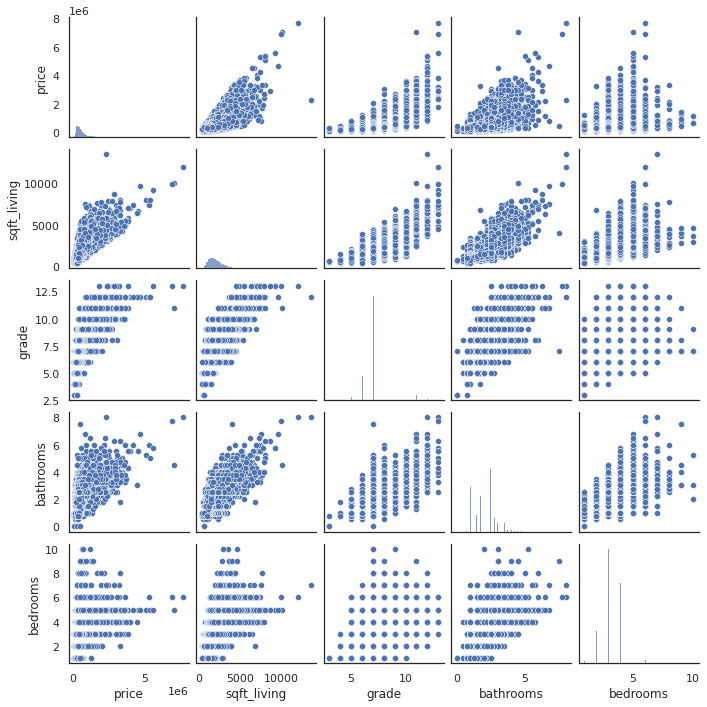

In [16]:
sns.set(style='white')
sns.pairplot(df_corr, height=2)
plt.show()

In [17]:
# Sqft Living = sqft_basement + sqft_above
df[['sqft_living','sqft_basement','sqft_above', 'price']].head(20)

sqft_living  sqft_basement  sqft_above      price
0          1180              0        1180   221900.0
1          2570            400        2170   538000.0
2           770              0         770   180000.0
3          1960            910        1050   604000.0
4          1680              0        1680   510000.0
5          5420           1530        3890  1225000.0
6          1715              0        1715   257500.0
7          1060              0        1060   291850.0
8          1780            730        1050   229500.0
9          1890              0        1890   323000.0
10         3560           1700        1860   662500.0
11         1160            300         860   468000.0
12         1430              0        1430   310000.0
13         1370              0        1370   400000.0
14         1810              0        1810   530000.0
15         2950            970        1980   650000.0
16         1890              0        1890   395000.0
17         1600              0        1600   485000.0
18         1200              0        1200   189000.0
19         1250              0        1250   230000.0

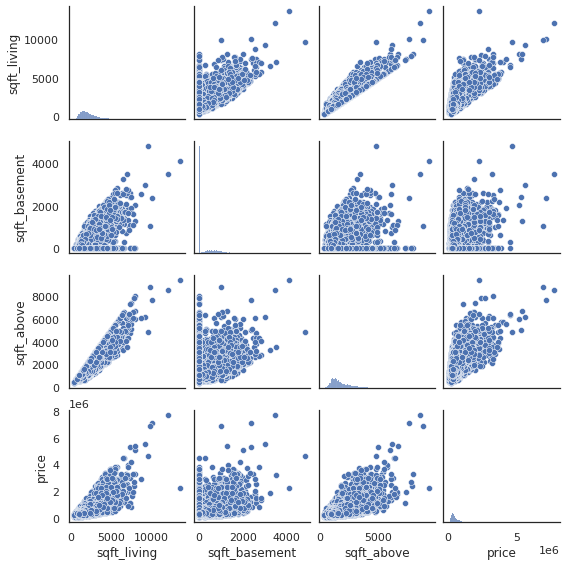

In [18]:
df_corr_area = df[['sqft_living','sqft_basement','sqft_above', 'price']]
sns.set(style='white')
sns.pairplot(df_corr_area, height=2)
plt.show()

# Descriptive Analysis

## CEO Queries:

👇  Why the CEO has raised questions about the business plan?

If you were the CEO, why would you ask this? Is your objective to increase income? How is the business performance?

Sales in 2015 has decreased 48% compared to 2014, therefore the business is not performing well compared to previous year

 sales in 2015 has been 47.97% lower than 2014


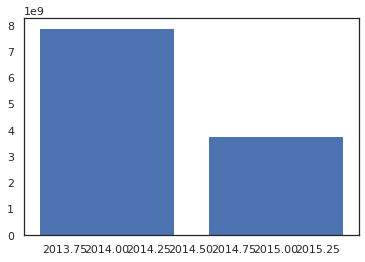

In [19]:
df['df_year'] = df['date'].dt.year
resul = df.groupby('df_year')['price'].sum().reset_index()
resul
plt.bar(resul.df_year, resul.price)
vendas_2014 = resul.price[0]
vendas_2015 = round((resul.price[1]/vendas_2014)*100,2)
#print(vendas_2014)
print(f" sales in 2015 has been {vendas_2015}% lower than 2014")

## Hyphotheses regarding business behaviour

**Bedrooms**

1 - Houses with more bedrooms are more expensive? Why? \
2 - How many rooms does the price increase? \
3 - What is the price increment for each room added?

Casas com muitos quartos são mais caras? Porque? A partir de quantos quartos o preço aumenta? Qual o incremento de preço por cada quarto adicionado?

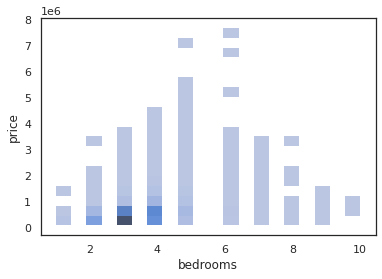

In [20]:
sns.histplot(data = df, x = 'bedrooms', y = 'price', bins = 20, kde = False);

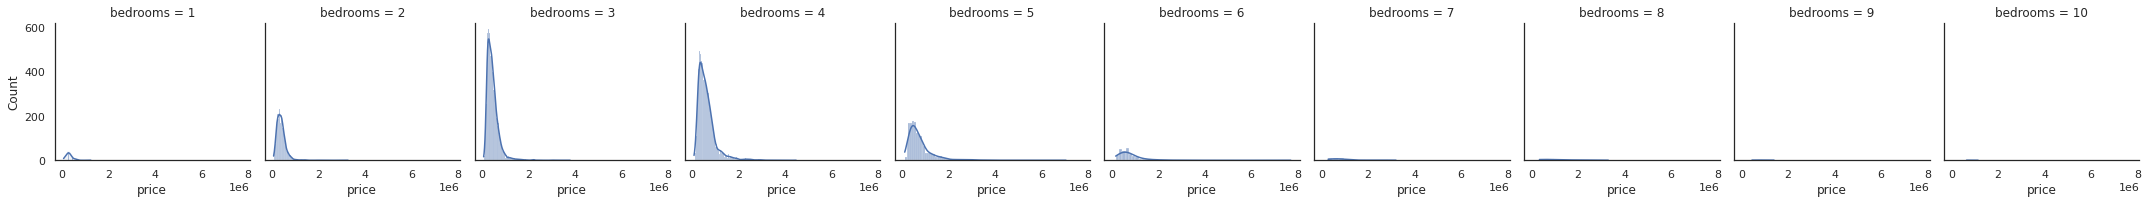

In [21]:
# Your code here
g = sns.FacetGrid(df, col="bedrooms") #row="smoker", hue='smoker'
g.map(sns.histplot, "price", kde=True)

In [22]:
df_bed = df[['price', 'bedrooms']]

In [23]:
from sklearn.preprocessing import OneHotEncoder

df_bed.bedrooms.unique() # Check unique categories in bedrooms

bedrooms_ohe = OneHotEncoder(sparse=False) # Instanciate One hot encoder

bedrooms_ohe.fit(df_bed[['bedrooms']]) # Fit one hot encoder

bedrooms_ohe.categories_ # View categories of bedrooms

df_bed['bed1'],df_bed['bed2'],df_bed['bed3'],df_bed['bed4'], df_bed['bed5'], df_bed['bed6'], df_bed['bed7'], df_bed['bed8'], df_bed['bed9'], df_bed['bed10']  = bedrooms_ohe.fit_transform(df_bed[['bedrooms']]).T # Put encoded columns back in dataframe

df_bed.drop(columns=['bedrooms'], inplace = True) # Drop original column

df_bed.head()

/tmp/ipykernel_1467/2378801322.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bed['bed1'],df_bed['bed2'],df_bed['bed3'],df_bed['bed4'], df_bed['bed5'], df_bed['bed6'], df_bed['bed7'], df_bed['bed8'], df_bed['bed9'], df_bed['bed10']  = bedrooms_ohe.fit_transform(df_bed[['bedrooms']]).T # Put encoded columns back in dataframe
/home/thamirisbrandao/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


price  bed1  bed2  bed3  bed4  bed5  bed6  bed7  bed8  bed9  bed10
0  221900.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0
1  538000.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0
2  180000.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0
3  604000.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0    0.0
4  510000.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0

In [24]:
# Apply price into each bedroom column
df_bed['bed1_price'] = df_bed['bed1']*df_bed['price']
df_bed['bed2_price'] = df_bed['bed2']*df_bed['price']
df_bed['bed3_price'] = df_bed['bed3']*df_bed['price']
df_bed['bed4_price'] = df_bed['bed4']*df_bed['price']
df_bed['bed5_price'] = df_bed['bed5']*df_bed['price']
df_bed['bed6_price'] = df_bed['bed6']*df_bed['price']
df_bed['bed7_price'] = df_bed['bed7']*df_bed['price']
df_bed['bed8_price'] = df_bed['bed8']*df_bed['price']
df_bed['bed9_price'] = df_bed['bed9']*df_bed['price']
df_bed['bed10_price'] = df_bed['bed10']*df_bed['price']




/tmp/ipykernel_1467/4132171089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bed['bed1_price'] = df_bed['bed1']*df_bed['price']
/tmp/ipykernel_1467/4132171089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bed['bed2_price'] = df_bed['bed2']*df_bed['price']
/tmp/ipykernel_1467/4132171089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [25]:
df_bed.columns

Index(['price', 'bed1', 'bed2', 'bed3', 'bed4', 'bed5', 'bed6', 'bed7', 'bed8',
       'bed9', 'bed10', 'bed1_price', 'bed2_price', 'bed3_price', 'bed4_price',
       'bed5_price', 'bed6_price', 'bed7_price', 'bed8_price', 'bed9_price',
       'bed10_price'],
      dtype='object')

In [26]:
df_bed_price = df_bed[['bed1_price', 'bed2_price', 'bed3_price', 'bed4_price',
       'bed5_price', 'bed6_price', 'bed7_price', 'bed8_price', 'bed9_price',
       'bed10_price']]

In [27]:
df_bed_price.head()

bed1_price  bed2_price  bed3_price  bed4_price  bed5_price  bed6_price  \
0         0.0         0.0    221900.0         0.0         0.0         0.0   
1         0.0         0.0    538000.0         0.0         0.0         0.0   
2         0.0    180000.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0    604000.0         0.0         0.0   
4         0.0         0.0    510000.0         0.0         0.0         0.0   

   bed7_price  bed8_price  bed9_price  bed10_price  
0         0.0         0.0         0.0          0.0  
1         0.0         0.0         0.0          0.0  
2         0.0         0.0         0.0          0.0  
3         0.0         0.0         0.0          0.0  
4         0.0         0.0         0.0          0.0

In [28]:
df_bed_price.describe()

bed1_price    bed2_price    bed3_price    bed4_price    bed5_price  \
count  2.159800e+04  2.159800e+04  2.159800e+04  2.159800e+04  2.159800e+04   
mean   2.926703e+03  5.129126e+04  2.120689e+05  2.024705e+05  5.830847e+04   
std    3.353047e+04  1.515515e+05  2.919523e+05  3.684769e+05  2.623004e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  3.896500e+05  3.565000e+05  0.000000e+00   
max    1.247000e+06  3.278000e+06  3.800000e+06  4.489000e+06  7.062500e+06   

         bed6_price    bed7_price    bed8_price    bed9_price   bed10_price  
count  2.159800e+04  2.159800e+04  2.159800e+04  2.159800e+04  2.159800e+04  
mean   1.039641e+04  1.673535e+03  6.651542e+02  2.483563e+02  1.138068e+02  
std    1.284143e+05  5.027072e+04  3.438313e+04  1.599000e+04  1.003703e+04  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
max    7.700000e+06  3.200000e+06  3.300000e+06  1.400000e+06  1.148000e+06

In [29]:
df_bed_price.head()

bed1_price  bed2_price  bed3_price  bed4_price  bed5_price  bed6_price  \
0         0.0         0.0    221900.0         0.0         0.0         0.0   
1         0.0         0.0    538000.0         0.0         0.0         0.0   
2         0.0    180000.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0    604000.0         0.0         0.0   
4         0.0         0.0    510000.0         0.0         0.0         0.0   

   bed7_price  bed8_price  bed9_price  bed10_price  
0         0.0         0.0         0.0          0.0  
1         0.0         0.0         0.0          0.0  
2         0.0         0.0         0.0          0.0  
3         0.0         0.0         0.0          0.0  
4         0.0         0.0         0.0          0.0

In [30]:
df_bed_price.mask(df_bed_price == 0, other = np.nan, inplace=True)

/home/thamirisbrandao/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:9032: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._where(cond, other, inplace, axis, level, errors=errors)


In [31]:
#df_bed_price.replace(0, np.nan, inplace=True)

In [32]:
df_bed_price.describe()

bed1_price    bed2_price    bed3_price    bed4_price    bed5_price  \
count  1.990000e+02  2.760000e+03  9.824000e+03  6.882000e+03  1.601000e+03   
mean   3.176429e+05  4.013727e+05  4.662321e+05  6.354195e+05  7.865998e+05   
std    1.488650e+05  1.980518e+05  2.624698e+05  3.885944e+05  5.962040e+05   
min    7.500000e+04  7.800000e+04  8.200000e+04  1.000000e+05  1.330000e+05   
25%    2.220000e+05  2.698375e+05  2.954875e+05  3.769625e+05  4.380000e+05   
50%    2.990000e+05  3.740000e+05  4.130000e+05  5.499975e+05  6.200000e+05   
75%    3.900000e+05  4.900000e+05  5.600000e+05  7.650000e+05  9.138880e+05   
max    1.247000e+06  3.278000e+06  3.800000e+06  4.489000e+06  7.062500e+06   

         bed6_price    bed7_price    bed8_price    bed9_price   bed10_price  
count  2.720000e+02  3.800000e+01  1.300000e+01  6.000000e+00  3.000000e+00  
mean   8.255206e+05  9.511847e+05  1.105077e+06  8.939998e+05  8.193333e+05  
std    7.992388e+05  7.399536e+05  8.974957e+05  3.815339e+05  2.846776e+05  
min    1.750000e+05  2.800000e+05  3.400000e+05  4.500000e+05  6.500000e+05  
25%    4.350000e+05  5.392500e+05  4.900000e+05  6.249992e+05  6.550000e+05  
50%    6.500000e+05  7.285800e+05  7.000000e+05  8.170000e+05  6.600000e+05  
75%    8.962500e+05  9.465000e+05  1.650000e+06  1.193500e+06  9.040000e+05  
max    7.700000e+06  3.200000e+06  3.300000e+06  1.400000e+06  1.148000e+06

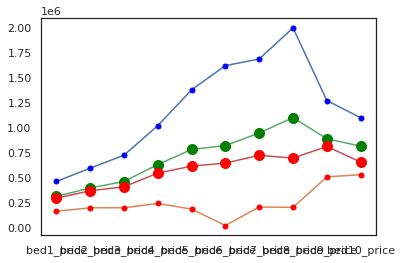

In [33]:
x = df_bed_price.mean() + df_bed_price.std()
y = df_bed_price.mean() - df_bed_price.std()

plt.plot(x, marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue" )
plt.plot(y, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
plt.plot(df_bed_price.mean(), marker="o", markersize=10, markeredgecolor="green", markerfacecolor="green")
plt.plot(df_bed_price.median(), marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red");

👇  **Respostas**

Ateh 3 quartos o preco aumenta cera de 67mil com desvio padrao de 4,7mil \
A media do crescimento de 4 quartos para 8 quartos eh de 123mil com desvio padrao de 8,8 mil \
Casas superiores a 8 quartos, o preco nao aumenta em funcao do aumento de quartos, o preco cai 75 mil com desvio padrao de 252mil

### Linear Regression model: Price vs Bedrooms

In [34]:
X_bed = df_bed.drop(columns = 'price')
y_bed = df_bed['price']

#### Base Modeling

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model_bed = LinearRegression()

scores_bed = cross_val_score(model_bed, X_bed, y_bed, cv=10)

base_model_score_bed = scores_bed.mean()

base_model_score_bed

1.0

#### OLS Model

In [36]:
df_bed.columns

Index(['price', 'bed1', 'bed2', 'bed3', 'bed4', 'bed5', 'bed6', 'bed7', 'bed8',
       'bed9', 'bed10', 'bed1_price', 'bed2_price', 'bed3_price', 'bed4_price',
       'bed5_price', 'bed6_price', 'bed7_price', 'bed8_price', 'bed9_price',
       'bed10_price'],
      dtype='object')

In [37]:
features_bed = ['bed1', 'bed2', 'bed3', 'bed4', 'bed5', 'bed6', 'bed7', 'bed8',
       'bed9', 'bed10']

In [38]:
formula_bed = "price ~ " + ' + '.join(features_bed)

In [39]:
import statsmodels.formula.api as smf
model_OS_bed = smf.ols(formula = formula_bed, data = df_bed).fit()
print(model_OS_bed.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     286.0
Date:                Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:53:59   Log-Likelihood:            -3.0618e+05
No. Observations:               21598   AIC:                         6.124e+05
Df Residuals:                   21588   BIC:                         6.125e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.548e+05   2.47e+04     26.498      0.0

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

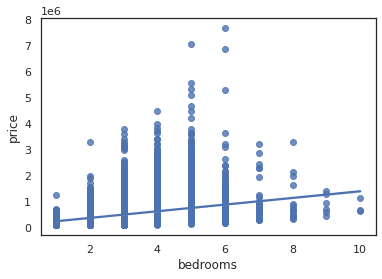

In [40]:
sns.regplot(data = df, x = 'bedrooms', y = 'price')

In [41]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
model1 = smf.ols(formula = 'price ~ bedrooms', data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     2406.
Date:                Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:54:01   Log-Likelihood:            -3.0625e+05
No. Observations:               21598   AIC:                         6.125e+05
Df Residuals:                   21596   BIC:                         6.125e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.062e+05   9158.878     11.598      0.000    8.83e+04    1.24e+05
bedrooms    1.287e+05   2624.329     49.050      0.000    1.24e+05    1.34e+05
==============================================================================
Omnibus:                    18933.232   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1173587.229
Skew:                           3.945   Prob(JB):                         0.00
Kurtosis:                      38.240   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
model1.params

Intercept    106221.090137
bedrooms     128722.405620
dtype: float64

### Checking prices up to 3 bedrooms

In [43]:
df_3bed = df[df['bedrooms'] <=3]

In [44]:
model_3bed = smf.ols(formula = 'price ~ bedrooms', data=df_3bed).fit()
model_3bed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     203.1
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           9.62e-46
Time:                        13:54:01   Log-Likelihood:            -1.7694e+05
No. Observations:               12783   AIC:                         3.539e+05
Df Residuals:                   12781   BIC:                         3.539e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.648e+05   1.32e+04     20.108      0.000    2.39e+05    2.91e+05
bedrooms    6.723e+04   4716.963     14.253      0.000     5.8e+04    7.65e+04
==============================================================================
Omnibus:                     9354.989   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           274487.646
Skew:                           3.200   Prob(JB):                         0.00
Kurtosis:                      24.781   Cond. No.                         18.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
model_3bed.params

Intercept    264831.657677
bedrooms      67230.837285
dtype: float64

### Checking prices between 4 to 8 bedrooms

In [46]:
df_4bed = df[(df['bedrooms'] >=4) & (df['bedrooms'] <=8)]

In [47]:
model_4bed = smf.ols(formula = 'price ~ bedrooms', data=df_4bed).fit()
model_4bed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     193.7
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           1.44e-43
Time:                        13:54:01   Log-Likelihood:            -1.2720e+05
No. Observations:                8806   AIC:                         2.544e+05
Df Residuals:                    8804   BIC:                         2.544e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.462e+05    3.8e+04      3.846      0.000    7.17e+04    2.21e+05
bedrooms    1.231e+05   8844.478     13.917      0.000    1.06e+05     1.4e+05
==============================================================================
Omnibus:                     7052.306   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           267355.029
Skew:                           3.567   Prob(JB):                         0.00
Kurtosis:                      29.034   Cond. No.                         35.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
model_4bed.params

Intercept    146174.331457
bedrooms     123088.978851
dtype: float64

### Checking prices above 9 bedrooms

In [49]:
df_9bed = df[df['bedrooms'] >=9]

In [50]:
model_9bed = smf.ols(formula = 'price ~ bedrooms', data=df_9bed).fit()
model_9bed.summary()

/home/thamirisbrandao/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.129
Method:                 Least Squares   F-statistic:                   0.08771
Date:                Fri, 22 Apr 2022   Prob (F-statistic):              0.776
Time:                        13:54:01   Log-Likelihood:                -126.70
No. Observations:                   9   AIC:                             257.4
Df Residuals:                       7   BIC:                             257.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.566e+06   2.36e+06      0.665      0.528   -4.01e+06    7.14e+06
bedrooms   -7.467e+04   2.52e+05     -0.296      0.776   -6.71e+05    5.22e+05
==============================================================================
Omnibus:                        1.510   Durbin-Watson:                   2.914
Prob(Omnibus):                  0.470   Jarque-Bera (JB):                0.812
Skew:                           0.334   Prob(JB):                        0.666
Kurtosis:                       1.689   Cond. No.                         187.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
model_9bed.params

Intercept    1.565998e+06
bedrooms    -7.466650e+04
dtype: float64

## Location

As casas mais caras estão no centro? Qual a região? Existe alguma coisa na região que tem correlação com valor de venda da casa? Shoppings? Montanhas? Pessoas Famosas?

/home/thamirisbrandao/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


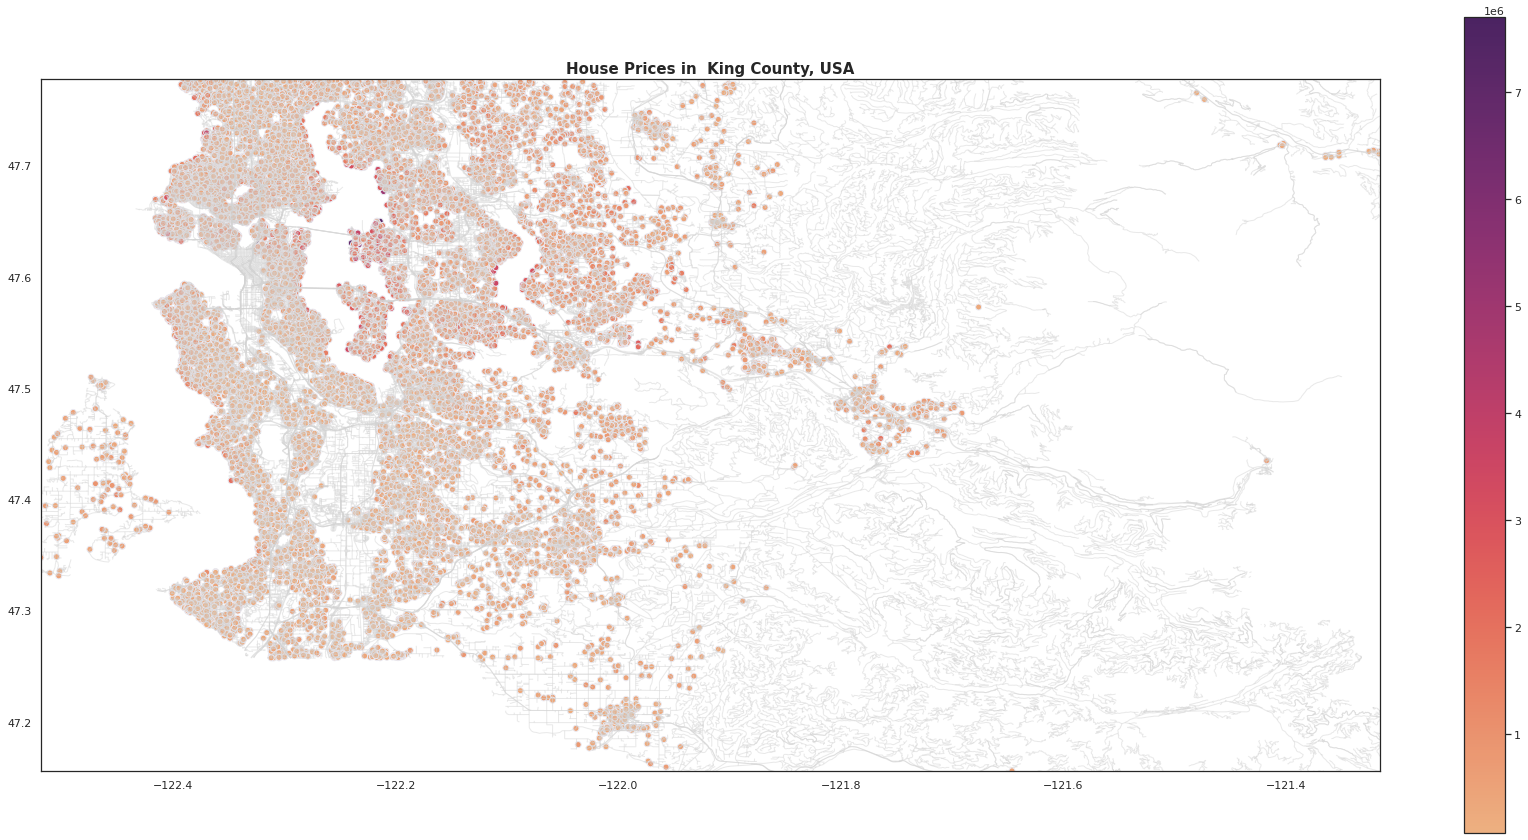

In [52]:
sns.mpl.rc('figure', figsize=(30,15))

# Setting the path to the shapefile
SHAPEFILE = '../raw_data/maps/tl_2017_53033_roads.shp'


# import king county street map
street_map = gpd.read_file(SHAPEFILE)

# designate coordinate system
crs = {'init':"EPSG:3857"}

# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]

# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df,crs = crs,geometry = geometry)


# create figure and axes, assign to subplot
fig, ax = plt.subplots()

# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.5,edgecolor='blue', linewidth=1, color='lightgrey')


# assign ‘price’ variable to represent coordinates on graph
my_cmap = sns.color_palette("flare", as_cmap=True)
geo_df.plot(column='price',ax=ax,   legend=True, cmap=my_cmap , edgecolor='#EAEAF2' ) # 

# add title to graph
plt.title('House Prices in  King County, USA', fontsize=15,fontweight='bold' )

# set latitiude and longitude boundaries for map display
plt.xlim(df['long'].min() ,df['long'].max())
plt.ylim( df['lat'].min() ,df['lat'].max() )

# show map
plt.show()

**Average of prices house sales by zip code on the map** \
The most expensive house is located in Lake Washington (red circle in the map) \
Yelow and green circles are more expenses, they are located in Bellevue and Mercer Island \
Blue circles are average prices \
Darkblue colors have lower prices, few houses close to airports and highways

In [53]:
#add heatmao scall to map 

mymap = folium.Map(location= [df['lat'].min() , df['long'].max()], zoom_start =9) 

# Get the highest average house price
maxave = int(df.groupby(['zipcode']).mean()['price'].max())
meanave = int(df.groupby(['zipcode']).mean()['price'].mean())
minave = int(df.groupby(['zipcode']).mean()['price'].min())
print("Highest Avg by Zipcode of City House Price is: ", maxave)
print("Average by Zipcode of City House Price is: ", meanave)
print("Lowest Avg by Zipcode of City House Price is: ", minave)

# Create a color map to match house prices. White - low price, Black - high price
colormap = ['#00009B' ,'#0099FF' ,'#63FF9B' ,'#FFFB00' ,'#FF2F00' , '#8B0000']

# Add marker info 

for index, row in df.groupby('zipcode').agg({'lat': 'mean','long': 'mean', 'price':'mean', 'zipcode':'count' }).iterrows(): 
    # Set icon color based on price 
    theCol = colormap[ int((len(colormap) - 1 ) *  float( row['price']) / maxave) ]
    markerText =  ( 'Average price : ' + str(round(row['price'], 2) ) +' $' + '\n' + 'Houses sold : ' + str(row['zipcode']) )
    folium.CircleMarker( radius=(row['zipcode'])/15, location=[row['lat'],row['long']], 
                        popup=folium.Popup(markerText,max_width=150,min_width=150), 
                        color= theCol,fill=True,fill_color=theCol, ).add_to(mymap)

FloatImage('https://lh3.googleusercontent.com/proxy/SRXTqZngcyOscx1nR1iB9c4IobPtOn0cEROsZ_wK6CO3nfAjD4e4TDXPDjN3AU2ZLJxzJQaoLJnlqk9zZevN7S2wZZctQysIIKOvigpGatc', bottom=0, left=65).add_to(mymap)
mymap

Highest Avg by Zipcode of City House Price is:  2160606
Average by Zipcode of City House Price is:  560861
Lowest Avg by Zipcode of City House Price is:  234284


In [54]:
import plotly.express as px
fig = px.scatter(data_frame = df[df['bedrooms'] < 13],
    x="sqft_living",
    y="price",
    size="bedrooms",
    color="bedrooms",
    #size_max = 100,
    opacity = 0.5
)
fig.show()

# Base Modelling

👇 Prepare the feature set `X` and target `y`. Remember that we want to model the `SalePrice` with the preprocessed features.

In [55]:
X_base = df.drop(columns=['price','id','date', 'geometry'])
y_base = df['price']

👇 Cross validate a linear regression model. The score under variable name saved as `base_model_score`.

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model_base = LinearRegression()

scores_base = cross_val_score(model_base, X_base, y_base, cv=10)

base_model_score_base = scores_base.mean()

base_model_score_base

0.6975092408007649

In [57]:
scores_base

array([0.69690724, 0.70005019, 0.69032823, 0.69335416, 0.6823978 ,
       0.70653006, 0.71308788, 0.71553101, 0.70047814, 0.67642769])

👇 Feature Permutation to identify the importance of each feature in the model

In [58]:
from sklearn.inspection import permutation_importance

model_permut = LinearRegression().fit(X_base, y_base) # Fit model

permutation_score_permut = permutation_importance(model_permut, X_base, y_base, n_repeats=300) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X_base.columns,
                                        permutation_score_permut.importances_mean)).T) # Unstack results

importance_df.columns=['feature','feature importance'] # Change column names

importance_df.sort_values(by="feature importance", ascending = False) # Order by importance

feature feature importance
8           grade           0.189705
2     sqft_living           0.156532
14            lat           0.103924
11       yr_built           0.088919
9      sqft_above            0.05186
5      waterfront           0.037604
6            view           0.023759
0        bedrooms           0.018775
1       bathrooms           0.015646
13        zipcode           0.014539
15           long           0.013447
7       condition           0.004889
10  sqft_basement           0.004774
16  sqft_living15           0.003163
18        df_year           0.003076
17     sqft_lot15           0.001697
12   yr_renovated           0.000997
3        sqft_lot           0.000379
4          floors           0.000221

Removing floors form the model, as it shows the lowest importance

In [59]:
X_clean = df.drop(columns=['price','id','date', 'floors', 'geometry'])
y_clean = df['price']

In [60]:
model_clean = LinearRegression()

scores_clean = cross_val_score(model_clean, X_clean, y_clean, cv=10)

base_model_score_clean = scores_clean.mean()

base_model_score_clean

0.6974959893552926

# Multivariate Linear Regression (with statsmodel)

Selecting the features for our model

In [61]:
df.drop(columns = ['geometry', 'id', 'date'], inplace = True)

In [62]:
features = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'df_year']

In [63]:
formula = "price ~ " + ' + '.join(features)
formula

'price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15 + df_year'

⚖️ **Standardize the features.**

👉 In a `multivariate linear regression`, we are trying to measure the impact of each feature on the target. 
    
⚠️ Because of scale effects, some features will wrongly be seen as more important than others


📅 , we will discover Machine Learning Algorithms. We will also need to perform some scaling operations before trying to predict any target.

In [64]:

house_scaled = df.drop(columns = 'price').copy()

for f in house_scaled.columns:
    mu = df[f].mean()
    sigma = df[f].std()
    house_scaled[f] = house_scaled[f].apply(lambda x: (x-mu)/sigma)
    
house_scaled

bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  \
0     -0.411008  -1.449949    -0.980277 -0.228253 -0.915407   -0.087201   
1     -0.411008   0.174814     0.533534 -0.189810  0.937542   -0.087201   
2     -1.518412  -1.449949    -1.426797 -0.123211 -0.915407   -0.087201   
3      0.696396   1.149671    -0.130800 -0.243948 -0.915407   -0.087201   
4     -0.411008  -0.150139    -0.435741 -0.169574 -0.915407   -0.087201   
...         ...        ...          ...       ...       ...         ...   
21608 -0.411008   0.499766    -0.599101 -0.337375  2.790491   -0.087201   
21609  0.696396   0.499766     0.250375 -0.224317  0.937542   -0.087201   
21610 -1.518412  -1.774902    -1.154529 -0.332087  0.937542   -0.087201   
21611 -0.411008   0.499766    -0.522866 -0.307022  0.937542   -0.087201   
21612 -1.518412  -1.774902    -1.154529 -0.338703  0.937542   -0.087201   

           view  condition     grade  sqft_above  sqft_basement  yr_built  \
0     -0.305701  -0.629822 -0.560054   -0.734995      -0.658871 -0.544757   
1     -0.305701  -0.629822 -0.560054    0.460913       0.244754 -0.680938   
2     -0.305701  -0.629822 -1.411828   -1.230270      -0.658871 -1.293753   
3     -0.305701   2.444624 -0.560054   -0.892033       1.396876 -0.204305   
4     -0.305701  -0.629822  0.291720   -0.131001      -0.658871  0.544691   
...         ...        ...       ...         ...            ...       ...   
21608 -0.305701  -0.629822  0.291720   -0.312199      -0.658871  1.293687   
21609 -0.305701  -0.629822  0.291720    0.630032      -0.658871  1.463913   
21610 -0.305701  -0.629822 -0.560054   -0.928273      -0.658871  1.293687   
21611 -0.305701  -0.629822  0.291720   -0.227640      -0.658871  1.123460   
21612 -0.305701  -0.629822 -0.560054   -0.928273      -0.658871  1.259641   

       yr_renovated   zipcode       lat      long  sqft_living15  sqft_lot15  \
0         -0.210080  1.869738 -0.352738 -0.306000      -0.943568   -0.260725   
1          4.747569  0.879330  1.161388 -0.746414      -0.432805   -0.187800   
2         -0.210080 -0.933303  1.283355 -0.135517       1.070299   -0.172291   
3         -0.210080  1.084887 -0.283455 -1.272070      -0.914381   -0.284557   
4         -0.210080 -0.073703  0.409376  1.199933      -0.272279   -0.192786   
...             ...       ...       ...       ...            ...         ...   
21608     -0.210080  0.468218  1.004779 -0.938207      -0.666296   -0.412551   
21609     -0.210080  1.271756 -0.356347 -1.051863      -0.228499   -0.203896   
21610     -0.210080  1.234382  0.247716 -0.604345      -1.410552   -0.394293   
21611     -0.210080 -0.951990 -0.184582  1.029450      -0.841415   -0.420691   
21612     -0.210080  1.234382  0.245551 -0.604345      -1.410552   -0.418124   

        df_year  
0     -0.690701  
1     -0.690701  
2      1.447738  
3     -0.690701  
4      1.447738  
...         ...  
21608 -0.690701  
21609  1.447738  
21610 -0.690701  
21611  1.447738  
21612 -0.690701  

[21598 rows x 19 columns]

## Detect multicolinearity



🚀 **VIF: Variance Inflation Factor** \
A measure of the amount of multicolinearity per feature \
The higher, the more multicolinear, the less useful the feature with a high VIF... \
Computed by regressing one feature as function of all others features and measuring R-squared

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = house_scaled.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [vif(house_scaled.values, i)
                   for i in range(len(house_scaled.columns))]
round(vif_data.sort_values(by="VIF", ascending = False),2)  
#print(vif_data)

/home/thamirisbrandao/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning:

divide by zero encountered in double_scalars



feature   VIF
9      sqft_above   inf
2     sqft_living   inf
10  sqft_basement   inf
8           grade  3.43
1       bathrooms  3.38
16  sqft_living15  2.98
11       yr_built  2.43
17     sqft_lot15  2.13
3        sqft_lot  2.10
4          floors  2.02
15           long  1.83
0        bedrooms  1.71
13        zipcode  1.66
6            view  1.44
7       condition  1.25
5      waterfront  1.20
14            lat  1.18
12   yr_renovated  1.15
18        df_year  1.01

☝️ Consider VIF value  ≥ 10 as potential cause of concern (rule of thumbs)

**Conclusion:** High multicolinearity between the features =>  sqft_living = sqft_above + sqft_basement \
 Scenario **A**: Exclude sqft_above + sqft_basement \
 Scenario **B**: Exclude sqft_living

### Scenario A

In [66]:
# df_scenario_A = df.drop(columns=['sqft_above', 'sqft_basement'])
# house_scaled_A = df_scenario_A.copy()

# for f in house_scaled_A.columns:
#     mu = df[f].mean()
#     sigma = df[f].std()
#     house_scaled_A[f] = house_scaled_A[f].apply(lambda x: (x-mu)/sigma)
    
# #house_scaled_A

# # VIF dataframe
# vif_data = pd.DataFrame()
# vif_data["feature"] = house_scaled_A.columns
  
# # calculating VIF for each feature
# vif_data["VIF"] = [vif(house_scaled_A.values, i)
#                    for i in range(len(house_scaled_A.columns))]
# round(vif_data.sort_values(by="VIF", ascending = False),2) 


In [67]:
# features_A = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront',
#               'view', 'condition', 'grade','yr_built', 'yr_renovated', 'zipcode','lat',
#               'long', 'sqft_living15', 'sqft_lot15', 'df_year']

# formula_A = "price ~ " + ' + '.join(features_A)

# # Model:
# model_A = smf.ols(formula = formula_A, data = house_scaled_A).fit()
# model_A.summary()


### Scenario B

In [68]:
df_scenario_B = df.drop(columns=['sqft_living'])
house_scaled_B = df_scenario_B.copy()

for f in house_scaled_B.columns:
    mu = df[f].mean()
    sigma = df[f].std()
    house_scaled_B[f] = house_scaled_B[f].apply(lambda x: (x-mu)/sigma)
    
#house_scaled_A

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = house_scaled_B.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [vif(house_scaled_B.values, i)
                   for i in range(len(house_scaled_B.columns))]
round(vif_data.sort_values(by="VIF", ascending = False),2)

feature   VIF
9      sqft_above  5.55
8           grade  3.75
2       bathrooms  3.41
0           price  3.36
16  sqft_living15  2.99
11       yr_built  2.58
10  sqft_basement  2.14
17     sqft_lot15  2.14
3        sqft_lot  2.10
4          floors  2.02
15           long  1.85
1        bedrooms  1.74
13        zipcode  1.69
6            view  1.48
14            lat  1.36
5      waterfront  1.27
7       condition  1.26
12   yr_renovated  1.15
18        df_year  1.01

In [69]:
features_B = ['bedrooms', 'bathrooms',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'df_year']
formula_B = "price ~ " + ' + '.join(features_B)

# Model:
model_B = smf.ols(formula = formula_B, data = house_scaled_B).fit()
model_B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2824.
Date:                Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:56:00   Log-Likelihood:                -17573.
No. Observations:               21598   AIC:                         3.518e+04
Df Residuals:                   21579   BIC:                         3.533e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.455e-16      0.004   1.74e-13      1.000      -0.007       0.007
bedrooms         -0.0967      0.005    -19.886      0.000      -0.106      -0.087
bathrooms         0.0885      0.007     12.949      0.000       0.075       0.102
sqft_lot          0.0138      0.005      2.562      0.010       0.003       0.024
floors            0.0106      0.005      2.005      0.045       0.000       0.021
waterfront        0.1373      0.004     33.663      0.000       0.129       0.145
view              0.1089      0.004     24.443      0.000       0.100       0.118
condition         0.0494      0.004     11.870      0.000       0.041       0.058
grade             0.3080      0.007     44.736      0.000       0.294       0.321
sqft_above        0.4133      0.008     49.843      0.000       0.397       0.430
sqft_basement     0.1838      0.005     34.698      0.000       0.173       0.194
yr_built         -0.2108      0.006    -36.356      0.000      -0.222      -0.199
yr_renovated      0.0225      0.004      5.637      0.000       0.015       0.030
zipcode          -0.0853      0.005    -17.791      0.000      -0.095      -0.076
lat               0.2277      0.004     56.377      0.000       0.220       0.236
long             -0.0820      0.005    -16.320      0.000      -0.092      -0.072
sqft_living15     0.0398      0.006      6.194      0.000       0.027       0.052
sqft_lot15       -0.0292      0.005     -5.382      0.000      -0.040      -0.019
df_year           0.0391      0.004     10.499      0.000       0.032       0.046
==============================================================================
Omnibus:                    18340.376   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1880746.362
Skew:                           3.553   Prob(JB):                         0.00
Kurtosis:                      48.160   Cond. No.                         5.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model B has shown a slightly better R-Squared, we will opt to use model B

## Polynomial Regression

In [70]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

###  Polynomial degree 2

In [71]:

# X_poly3 = house_scaled_B.drop(columns='price')
# y_poly = house_scaled_B['price']

# X_train, X_test, y_train, y_test = train_test_split(X_poly3, y_poly, test_size=0.30)

# poly_reg_d2 = PolynomialFeatures(degree = 2)
# x_poly_d2 = poly_reg_d2.fit_transform(X_train)
# lin_reg_d2 = LinearRegression()
# lin_reg_d2.fit(x_poly_d2,y_train)

In [72]:
# print(f'R² score: {r2_score(y_train, lin_reg_d2.predict(poly_reg_d2.fit_transform(X_train)))*100}')

In [73]:
# cv_results = cross_validate(lin_reg_d2, X_test, y_test, cv=3)
# cv_results['test_score'].mean()

###  Polynomial degree 3

In [74]:
house_scaled_B.head()

price  bedrooms  bathrooms  sqft_lot    floors  waterfront      view  \
0 -0.866865 -0.411008  -1.449949 -0.228253 -0.915407   -0.087201 -0.305701   
1 -0.005892 -0.411008   0.174814 -0.189810  0.937542   -0.087201 -0.305701   
2 -0.980989 -1.518412  -1.449949 -0.123211 -0.915407   -0.087201 -0.305701   
3  0.173875  0.696396   1.149671 -0.243948 -0.915407   -0.087201 -0.305701   
4 -0.082156 -0.411008  -0.150139 -0.169574 -0.915407   -0.087201 -0.305701   

   condition     grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0  -0.629822 -0.560054   -0.734995      -0.658871 -0.544757     -0.210080   
1  -0.629822 -0.560054    0.460913       0.244754 -0.680938      4.747569   
2  -0.629822 -1.411828   -1.230270      -0.658871 -1.293753     -0.210080   
3   2.444624 -0.560054   -0.892033       1.396876 -0.204305     -0.210080   
4  -0.629822  0.291720   -0.131001      -0.658871  0.544691     -0.210080   

    zipcode       lat      long  sqft_living15  sqft_lot15   df_year  
0  1.869738 -0.352738 -0.306000      -0.943568   -0.260725 -0.690701  
1  0.879330  1.161388 -0.746414      -0.432805   -0.187800 -0.690701  
2 -0.933303  1.283355 -0.135517       1.070299   -0.172291  1.447738  
3  1.084887 -0.283455 -1.272070      -0.914381   -0.284557 -0.690701  
4 -0.073703  0.409376  1.199933      -0.272279   -0.192786  1.447738

In [75]:

X_poly3 = house_scaled_B.drop(columns = 'price')
y_poly = df['price']

X_train, X_test, y_train, y_test = train_test_split(X_poly3, y_poly, test_size=0.30)

poly_reg_d3 = PolynomialFeatures(degree = 3)
x_poly_d3 = poly_reg_d3.fit_transform(X_train)
lin_reg_d3 = LinearRegression()
house_model = lin_reg_d3.fit(x_poly_d3,y_train)


In [76]:
print(f'R² score: {r2_score(y_train, lin_reg_d3.predict(poly_reg_d3.fit_transform(X_train)))*100}')

R² score: 91.11797683613942


In [77]:
# Test the model

In [78]:
cv_results = cross_validate(lin_reg_d3, X_test, y_test, cv=3)
cv_results['test_score'].mean()

0.6893652965544891

### Polynomial degree 4

In [79]:
# X_poly3 = house_scaled_B.drop(columns='price')
# y_poly = house_scaled_B['price']

# X_train, X_test, y_train, y_test = train_test_split(X_poly3, y_poly, test_size=0.30, random_state=42)

# poly_reg = PolynomialFeatures(degree = 4)
# x_poly = poly_reg.fit_transform(X_train)
# lin_reg2 = LinearRegression()
# lin_reg2.fit(x_poly,y_train)

In [80]:
# print(f'R² score: {r2_score(y_train, lin_reg2.predict(poly_reg.fit_transform(X_train)))*100}')

In [81]:
# cv_results = cross_validate(lin_reg2, X_test, y_test, cv=3)
# cv_results['test_score'].mean()

In [82]:
# Model Overfitting

# Calculate houses prices with model

Choosing Polynomial degree 3 to recalculate prices in the dataset

In [83]:
df_assessment = df.copy()

In [84]:
df_assessment = df_assessment.reset_index()

In [85]:
df_assessment.drop(columns = ['sqft_living','index'], inplace = True)

In [86]:
df_assessment

price  bedrooms  bathrooms  sqft_lot  floors  waterfront  view  \
0      221900.0         3       1.00      5650     1.0           0     0   
1      538000.0         3       2.25      7242     2.0           0     0   
2      180000.0         2       1.00     10000     1.0           0     0   
3      604000.0         4       3.00      5000     1.0           0     0   
4      510000.0         3       2.00      8080     1.0           0     0   
...         ...       ...        ...       ...     ...         ...   ...   
21593  360000.0         3       2.50      1131     3.0           0     0   
21594  400000.0         4       2.50      5813     2.0           0     0   
21595  402101.0         2       0.75      1350     2.0           0     0   
21596  400000.0         3       2.50      2388     2.0           0     0   
21597  325000.0         2       0.75      1076     2.0           0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0              3      7        1180              0      1955             0   
1              3      7        2170            400      1951          1991   
2              3      6         770              0      1933             0   
3              5      7        1050            910      1965             0   
4              3      8        1680              0      1987             0   
...          ...    ...         ...            ...       ...           ...   
21593          3      8        1530              0      2009             0   
21594          3      8        2310              0      2014             0   
21595          3      7        1020              0      2009             0   
21596          3      8        1600              0      2004             0   
21597          3      7        1020              0      2008             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  df_year  
0        98178  47.5112 -122.257           1340        5650     2014  
1        98125  47.7210 -122.319           1690        7639     2014  
2        98028  47.7379 -122.233           2720        8062     2015  
3        98136  47.5208 -122.393           1360        5000     2014  
4        98074  47.6168 -122.045           1800        7503     2015  
...        ...      ...      ...            ...         ...      ...  
21593    98103  47.6993 -122.346           1530        1509     2014  
21594    98146  47.5107 -122.362           1830        7200     2015  
21595    98144  47.5944 -122.299           1020        2007     2014  
21596    98027  47.5345 -122.069           1410        1287     2015  
21597    98144  47.5941 -122.299           1020        1357     2014  

[21598 rows x 19 columns]

In [87]:
df_assessment.head()

price  bedrooms  bathrooms  sqft_lot  floors  waterfront  view  \
0  221900.0         3       1.00      5650     1.0           0     0   
1  538000.0         3       2.25      7242     2.0           0     0   
2  180000.0         2       1.00     10000     1.0           0     0   
3  604000.0         4       3.00      5000     1.0           0     0   
4  510000.0         3       2.00      8080     1.0           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   
1          3      7        2170            400      1951          1991   
2          3      6         770              0      1933             0   
3          5      7        1050            910      1965             0   
4          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  df_year  
0    98178  47.5112 -122.257           1340        5650     2014  
1    98125  47.7210 -122.319           1690        7639     2014  
2    98028  47.7379 -122.233           2720        8062     2015  
3    98136  47.5208 -122.393           1360        5000     2014  
4    98074  47.6168 -122.045           1800        7503     2015

In [88]:
X_pred = df_assessment.drop(columns = 'price')

In [89]:
for f in X_pred.columns:
    mu = df[f].mean()
    sigma = df[f].std()
    X_pred[f] = X_pred[f].apply(lambda x: (x-mu)/sigma)

In [90]:
df_assessment.head(3)

price  bedrooms  bathrooms  sqft_lot  floors  waterfront  view  \
0  221900.0         3       1.00      5650     1.0           0     0   
1  538000.0         3       2.25      7242     2.0           0     0   
2  180000.0         2       1.00     10000     1.0           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   
1          3      7        2170            400      1951          1991   
2          3      6         770              0      1933             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  df_year  
0    98178  47.5112 -122.257           1340        5650     2014  
1    98125  47.7210 -122.319           1690        7639     2014  
2    98028  47.7379 -122.233           2720        8062     2015

In [91]:
# X_assesment = df_assessment.drop(columns = ['price'])
# Y_assesment = df_assessment['price']

In [92]:
# X_pred = df_assessment.sample(n=1)
# X_pred

In [93]:
x_poly_d3.shape

(15118, 1330)

In [94]:
x_pred_poly = poly_reg_d3.transform(X_pred)

In [95]:
x_pred_poly

array([[ 1.        , -0.41100787, -1.44994913, ..., -0.04695212,
        -0.12438336, -0.32951059],
       [ 1.        , -0.41100787,  0.17481357, ..., -0.02436021,
        -0.08959322, -0.32951059],
       [ 1.        , -1.51841156, -1.44994913, ...,  0.04297497,
        -0.36111284,  3.03438232],
       ...,
       [ 1.        , -1.51841156, -1.77490168, ..., -0.10738087,
        -0.18810405, -0.32951059],
       [ 1.        , -0.41100787,  0.49976612, ...,  0.25622176,
        -0.8817453 ,  3.03438232],
       [ 1.        , -1.51841156, -1.77490168, ..., -0.12075372,
        -0.19947338, -0.32951059]])

In [96]:
x_pred_poly.shape

(21598, 1330)

In [97]:
x_poly_d3.shape

(15118, 1330)

In [98]:
house_scaled_B.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'df_year'],
      dtype='object')

In [99]:
house_model.predict(x_pred_poly)

array([224630.875 , 489076.125 , 404752.    , ..., 260567.5   ,
       485711.4375, 261251.5625])

In [100]:
price_pred = house_model.predict(x_pred_poly)

In [101]:
price_pred_df = pd.DataFrame(price_pred, columns=['Price Pred'])

In [102]:
df_assessment['index'] = pd.Series(range(21598))

In [103]:
df_assessment

price  bedrooms  bathrooms  sqft_lot  floors  waterfront  view  \
0      221900.0         3       1.00      5650     1.0           0     0   
1      538000.0         3       2.25      7242     2.0           0     0   
2      180000.0         2       1.00     10000     1.0           0     0   
3      604000.0         4       3.00      5000     1.0           0     0   
4      510000.0         3       2.00      8080     1.0           0     0   
...         ...       ...        ...       ...     ...         ...   ...   
21593  360000.0         3       2.50      1131     3.0           0     0   
21594  400000.0         4       2.50      5813     2.0           0     0   
21595  402101.0         2       0.75      1350     2.0           0     0   
21596  400000.0         3       2.50      2388     2.0           0     0   
21597  325000.0         2       0.75      1076     2.0           0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0              3      7        1180              0      1955             0   
1              3      7        2170            400      1951          1991   
2              3      6         770              0      1933             0   
3              5      7        1050            910      1965             0   
4              3      8        1680              0      1987             0   
...          ...    ...         ...            ...       ...           ...   
21593          3      8        1530              0      2009             0   
21594          3      8        2310              0      2014             0   
21595          3      7        1020              0      2009             0   
21596          3      8        1600              0      2004             0   
21597          3      7        1020              0      2008             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  df_year  index  
0        98178  47.5112 -122.257           1340        5650     2014      0  
1        98125  47.7210 -122.319           1690        7639     2014      1  
2        98028  47.7379 -122.233           2720        8062     2015      2  
3        98136  47.5208 -122.393           1360        5000     2014      3  
4        98074  47.6168 -122.045           1800        7503     2015      4  
...        ...      ...      ...            ...         ...      ...    ...  
21593    98103  47.6993 -122.346           1530        1509     2014  21593  
21594    98146  47.5107 -122.362           1830        7200     2015  21594  
21595    98144  47.5944 -122.299           1020        2007     2014  21595  
21596    98027  47.5345 -122.069           1410        1287     2015  21596  
21597    98144  47.5941 -122.299           1020        1357     2014  21597  

[21598 rows x 20 columns]

In [104]:
price_pred_df['index'] = pd.Series(range(21598))

In [105]:
price_pred_df['Price Pred'] = round(price_pred_df['Price Pred'],0)
price_pred_df

Price Pred  index
0        224631.0      0
1        489076.0      1
2        404752.0      2
3        402011.0      3
4        520663.0      4
...           ...    ...
21593    506301.0  21593
21594    514222.0  21594
21595    260568.0  21595
21596    485711.0  21596
21597    261252.0  21597

[21598 rows x 2 columns]

In [106]:
df_final = pd.merge(df_assessment,price_pred_df, how = 'left', on = 'index' )

In [107]:
df_final

price  bedrooms  bathrooms  sqft_lot  floors  waterfront  view  \
0      221900.0         3       1.00      5650     1.0           0     0   
1      538000.0         3       2.25      7242     2.0           0     0   
2      180000.0         2       1.00     10000     1.0           0     0   
3      604000.0         4       3.00      5000     1.0           0     0   
4      510000.0         3       2.00      8080     1.0           0     0   
...         ...       ...        ...       ...     ...         ...   ...   
21593  360000.0         3       2.50      1131     3.0           0     0   
21594  400000.0         4       2.50      5813     2.0           0     0   
21595  402101.0         2       0.75      1350     2.0           0     0   
21596  400000.0         3       2.50      2388     2.0           0     0   
21597  325000.0         2       0.75      1076     2.0           0     0   

       condition  grade  sqft_above  ...  yr_built  yr_renovated  zipcode  \
0              3      7        1180  ...      1955             0    98178   
1              3      7        2170  ...      1951          1991    98125   
2              3      6         770  ...      1933             0    98028   
3              5      7        1050  ...      1965             0    98136   
4              3      8        1680  ...      1987             0    98074   
...          ...    ...         ...  ...       ...           ...      ...   
21593          3      8        1530  ...      2009             0    98103   
21594          3      8        2310  ...      2014             0    98146   
21595          3      7        1020  ...      2009             0    98144   
21596          3      8        1600  ...      2004             0    98027   
21597          3      7        1020  ...      2008             0    98144   

           lat     long  sqft_living15  sqft_lot15  df_year  index  Price Pred  
0      47.5112 -122.257           1340        5650     2014      0    224631.0  
1      47.7210 -122.319           1690        7639     2014      1    489076.0  
2      47.7379 -122.233           2720        8062     2015      2    404752.0  
3      47.5208 -122.393           1360        5000     2014      3    402011.0  
4      47.6168 -122.045           1800        7503     2015      4    520663.0  
...        ...      ...            ...         ...      ...    ...         ...  
21593  47.6993 -122.346           1530        1509     2014  21593    506301.0  
21594  47.5107 -122.362           1830        7200     2015  21594    514222.0  
21595  47.5944 -122.299           1020        2007     2014  21595    260568.0  
21596  47.5345 -122.069           1410        1287     2015  21596    485711.0  
21597  47.5941 -122.299           1020        1357     2014  21597    261252.0  

[21598 rows x 21 columns]

In [108]:
df_final['Price_diff'] = df_final['price'] - df_final['Price Pred']
df_final

price  bedrooms  bathrooms  sqft_lot  floors  waterfront  view  \
0      221900.0         3       1.00      5650     1.0           0     0   
1      538000.0         3       2.25      7242     2.0           0     0   
2      180000.0         2       1.00     10000     1.0           0     0   
3      604000.0         4       3.00      5000     1.0           0     0   
4      510000.0         3       2.00      8080     1.0           0     0   
...         ...       ...        ...       ...     ...         ...   ...   
21593  360000.0         3       2.50      1131     3.0           0     0   
21594  400000.0         4       2.50      5813     2.0           0     0   
21595  402101.0         2       0.75      1350     2.0           0     0   
21596  400000.0         3       2.50      2388     2.0           0     0   
21597  325000.0         2       0.75      1076     2.0           0     0   

       condition  grade  sqft_above  ...  yr_renovated  zipcode      lat  \
0              3      7        1180  ...             0    98178  47.5112   
1              3      7        2170  ...          1991    98125  47.7210   
2              3      6         770  ...             0    98028  47.7379   
3              5      7        1050  ...             0    98136  47.5208   
4              3      8        1680  ...             0    98074  47.6168   
...          ...    ...         ...  ...           ...      ...      ...   
21593          3      8        1530  ...             0    98103  47.6993   
21594          3      8        2310  ...             0    98146  47.5107   
21595          3      7        1020  ...             0    98144  47.5944   
21596          3      8        1600  ...             0    98027  47.5345   
21597          3      7        1020  ...             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  df_year  index  Price Pred  \
0     -122.257           1340        5650     2014      0    224631.0   
1     -122.319           1690        7639     2014      1    489076.0   
2     -122.233           2720        8062     2015      2    404752.0   
3     -122.393           1360        5000     2014      3    402011.0   
4     -122.045           1800        7503     2015      4    520663.0   
...        ...            ...         ...      ...    ...         ...   
21593 -122.346           1530        1509     2014  21593    506301.0   
21594 -122.362           1830        7200     2015  21594    514222.0   
21595 -122.299           1020        2007     2014  21595    260568.0   
21596 -122.069           1410        1287     2015  21596    485711.0   
21597 -122.299           1020        1357     2014  21597    261252.0   

       Price_diff  
0         -2731.0  
1         48924.0  
2       -224752.0  
3        201989.0  
4        -10663.0  
...           ...  
21593   -146301.0  
21594   -114222.0  
21595    141533.0  
21596    -85711.0  
21597     63748.0  

[21598 rows x 22 columns]

In [109]:
df_final['Price_diff %'] = round((df_final['Price_diff'] / df_final['Price Pred'])*100,0)
df_final

price  bedrooms  bathrooms  sqft_lot  floors  waterfront  view  \
0      221900.0         3       1.00      5650     1.0           0     0   
1      538000.0         3       2.25      7242     2.0           0     0   
2      180000.0         2       1.00     10000     1.0           0     0   
3      604000.0         4       3.00      5000     1.0           0     0   
4      510000.0         3       2.00      8080     1.0           0     0   
...         ...       ...        ...       ...     ...         ...   ...   
21593  360000.0         3       2.50      1131     3.0           0     0   
21594  400000.0         4       2.50      5813     2.0           0     0   
21595  402101.0         2       0.75      1350     2.0           0     0   
21596  400000.0         3       2.50      2388     2.0           0     0   
21597  325000.0         2       0.75      1076     2.0           0     0   

       condition  grade  sqft_above  ...  zipcode      lat     long  \
0              3      7        1180  ...    98178  47.5112 -122.257   
1              3      7        2170  ...    98125  47.7210 -122.319   
2              3      6         770  ...    98028  47.7379 -122.233   
3              5      7        1050  ...    98136  47.5208 -122.393   
4              3      8        1680  ...    98074  47.6168 -122.045   
...          ...    ...         ...  ...      ...      ...      ...   
21593          3      8        1530  ...    98103  47.6993 -122.346   
21594          3      8        2310  ...    98146  47.5107 -122.362   
21595          3      7        1020  ...    98144  47.5944 -122.299   
21596          3      8        1600  ...    98027  47.5345 -122.069   
21597          3      7        1020  ...    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  df_year  index  Price Pred  Price_diff  \
0               1340        5650     2014      0    224631.0     -2731.0   
1               1690        7639     2014      1    489076.0     48924.0   
2               2720        8062     2015      2    404752.0   -224752.0   
3               1360        5000     2014      3    402011.0    201989.0   
4               1800        7503     2015      4    520663.0    -10663.0   
...              ...         ...      ...    ...         ...         ...   
21593           1530        1509     2014  21593    506301.0   -146301.0   
21594           1830        7200     2015  21594    514222.0   -114222.0   
21595           1020        2007     2014  21595    260568.0    141533.0   
21596           1410        1287     2015  21596    485711.0    -85711.0   
21597           1020        1357     2014  21597    261252.0     63748.0   

       Price_diff %  
0              -1.0  
1              10.0  
2             -56.0  
3              50.0  
4              -2.0  
...             ...  
21593         -29.0  
21594         -22.0  
21595          54.0  
21596         -18.0  
21597          24.0  

[21598 rows x 23 columns]

In [110]:
df_final.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'df_year', 'index', 'Price Pred', 'Price_diff', 'Price_diff %'],
      dtype='object')

In [111]:
df_final['mkt ind'] = df_final['Price_diff'] < 0
df_final

price  bedrooms  bathrooms  sqft_lot  floors  waterfront  view  \
0      221900.0         3       1.00      5650     1.0           0     0   
1      538000.0         3       2.25      7242     2.0           0     0   
2      180000.0         2       1.00     10000     1.0           0     0   
3      604000.0         4       3.00      5000     1.0           0     0   
4      510000.0         3       2.00      8080     1.0           0     0   
...         ...       ...        ...       ...     ...         ...   ...   
21593  360000.0         3       2.50      1131     3.0           0     0   
21594  400000.0         4       2.50      5813     2.0           0     0   
21595  402101.0         2       0.75      1350     2.0           0     0   
21596  400000.0         3       2.50      2388     2.0           0     0   
21597  325000.0         2       0.75      1076     2.0           0     0   

       condition  grade  sqft_above  ...      lat     long  sqft_living15  \
0              3      7        1180  ...  47.5112 -122.257           1340   
1              3      7        2170  ...  47.7210 -122.319           1690   
2              3      6         770  ...  47.7379 -122.233           2720   
3              5      7        1050  ...  47.5208 -122.393           1360   
4              3      8        1680  ...  47.6168 -122.045           1800   
...          ...    ...         ...  ...      ...      ...            ...   
21593          3      8        1530  ...  47.6993 -122.346           1530   
21594          3      8        2310  ...  47.5107 -122.362           1830   
21595          3      7        1020  ...  47.5944 -122.299           1020   
21596          3      8        1600  ...  47.5345 -122.069           1410   
21597          3      7        1020  ...  47.5941 -122.299           1020   

       sqft_lot15  df_year  index  Price Pred  Price_diff  Price_diff %  \
0            5650     2014      0    224631.0     -2731.0          -1.0   
1            7639     2014      1    489076.0     48924.0          10.0   
2            8062     2015      2    404752.0   -224752.0         -56.0   
3            5000     2014      3    402011.0    201989.0          50.0   
4            7503     2015      4    520663.0    -10663.0          -2.0   
...           ...      ...    ...         ...         ...           ...   
21593        1509     2014  21593    506301.0   -146301.0         -29.0   
21594        7200     2015  21594    514222.0   -114222.0         -22.0   
21595        2007     2014  21595    260568.0    141533.0          54.0   
21596        1287     2015  21596    485711.0    -85711.0         -18.0   
21597        1357     2014  21597    261252.0     63748.0          24.0   

       mkt ind  
0         True  
1        False  
2         True  
3        False  
4         True  
...        ...  
21593     True  
21594     True  
21595    False  
21596     True  
21597    False  

[21598 rows x 24 columns]

In [112]:
df_final = df_final[['price', 'Price Pred','Price_diff', 'Price_diff %', 'mkt ind','bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'df_year']]

In [113]:
revenue_rev = df_final.groupby('df_year').count()['mkt ind']
revenue_rev

df_year
2014    14622
2015     6976
Name: mkt ind, dtype: int64

In [114]:
#rows = 'Account_number', cols= 'Product', aggfunc='count'
revenue_rev = df_final.pivot_table(index = 'df_year', columns= 'mkt ind', aggfunc='count')
revenue_rev['zipcode']


mkt ind  False  True
df_year             
2014      7049  7573
2015      3418  3558

In [115]:
buy_opp = df_final[(df_final['Price_diff %']<-30)]
buy_opp

price  Price Pred  Price_diff  Price_diff %  mkt ind  bedrooms  \
2       180000.0    404752.0   -224752.0         -56.0     True         2   
5      1225000.0   1971379.0   -746379.0         -38.0     True         4   
8       229500.0    352658.0   -123158.0         -35.0     True         3   
51      345000.0    500083.0   -155083.0         -31.0     True         5   
65      317625.0    639689.0   -322064.0         -50.0     True         3   
...          ...         ...         ...           ...      ...       ...   
21399   557500.0    946878.0   -389378.0         -41.0     True         3   
21418   465750.0    675024.0   -209274.0         -31.0     True         3   
21421   255000.0    378133.0   -123133.0         -33.0     True         3   
21428   250000.0    362576.0   -112576.0         -31.0     True         1   
21455   249000.0    427479.0   -178479.0         -42.0     True         3   

       bathrooms  sqft_lot  floors  waterfront  ...  sqft_above  \
2           1.00     10000     1.0           0  ...         770   
5           4.50    101930     1.0           0  ...        3890   
8           1.00      7470     1.0           0  ...        1050   
51          2.50      9134     1.0           0  ...        1640   
65          2.75      3809     1.5           0  ...        1770   
...          ...       ...     ...         ...  ...         ...   
21399       3.50      5025     2.0           0  ...        2670   
21418       2.50      4534     2.0           0  ...        2670   
21421       2.50      5720     2.0           0  ...        2555   
21428       1.50      1688     2.0           0  ...        1070   
21455       1.00     24750     1.0           0  ...        1030   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
2                  0      1933             0    98028  47.7379 -122.233   
5               1530      2001             0    98053  47.6561 -122.005   
8                730      1960             0    98146  47.5123 -122.337   
51              1510      1966             0    98056  47.4934 -122.189   
65              1000      1925             0    98144  47.5747 -122.304   
...              ...       ...           ...      ...      ...      ...   
21399            680      2014             0    98144  47.5699 -122.296   
21418              0      2007             0    98056  47.5100 -122.184   
21421              0      2006             0    98031  47.3860 -122.184   
21428            110      2007             0    98126  47.5490 -122.372   
21455              0      1943             0    98023  47.3343 -122.362   

       sqft_living15  sqft_lot15  df_year  
2               2720        8062     2015  
5               4760      101930     2014  
8               1780        8113     2015  
51              1990        9133     2015  
65              1440        4000     2014  
...              ...         ...      ...  
21399           2030        5117     2014  
21418           3040        5079     2014  
21421           2844        5769     2015  
21428           1380        2059     2015  
21455           2810       28800     2015  

[1079 rows x 23 columns]